In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
forest=pd.read_csv("forestfires.csv")
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [3]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest.T

0      1      2      3      4      5      6      7      8    \
month            mar    oct    oct    mar    mar    aug    aug    aug    sep   
day              fri    tue    sat    fri    sun    sun    mon    mon    tue   
FFMC            86.2   90.6   90.6   91.7   89.3   92.3   92.3   91.5   91.0   
DMC             26.2   35.4   43.7   33.3   51.3   85.3   88.9  145.4  129.5   
DC              94.3  669.1  686.9   77.5  102.2  488.0  495.6  608.2  692.6   
ISI              5.1    6.7    6.7    9.0    9.6   14.7    8.5   10.7    7.0   
temp             8.2   18.0   14.6    8.3   11.4   22.2   24.1    8.0   13.1   
RH                51     33     33     97     99     29     27     86     63   
wind             6.7    0.9    1.3    4.0    1.8    5.4    3.1    2.2    5.4   
rain             0.0    0.0    0.0    0.2    0.0    0.0    0.0    0.0    0.0   
area             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
dayfri             1      0      0      1      0      0      0      0      0   
daymon             0      0      0      0      0      0      1      1      0   
daysat             0      0      1      0      0      0      0      0      0   
daysun             0      0      0      0      1      1      0      0      0   
daythu             0      0      0      0      0      0      0      0      0   
daytue             0      1      0      0      0      0      0      0      1   
daywed             0      0      0      0      0      0      0      0      0   
monthapr           0      0      0      0      0      0      0      0      0   
monthaug           0      0      0      0      0      1      1      1      0   
monthdec           0      0      0      0      0      0      0      0      0   
monthfeb           0      0      0      0      0      0      0      0      0   
monthjan           0      0      0      0      0      0      0      0      0   
monthjul           0      0      0      0      0      0      0      0      0   
monthjun           0      0      0      0      0      0      0      0      0   
monthmar           1      0      0      1      1      0      0      0      0   
monthmay           0      0      0      0      0      0      0      0      0   
monthnov           0      0      0      0      0      0      0      0      0   
monthoct           0      1      1      0      0      0      0      0      0   
monthsep           0      0      0      0      0      0      0      0      1   
size_category  small  small  small  small  small  small  small  small  small   

                 9    ...    507    508    509    510    511    512    513  \
month            sep  ...    aug    aug    aug    aug    aug    aug    aug   
day              sat  ...    fri    fri    fri    fri    sun    sun    sun   
FFMC            92.5  ...   91.0   91.0   91.0   91.0   81.6   81.6   81.6   
DMC             88.0  ...  166.9  166.9  166.9  166.9   56.7   56.7   56.7   
DC             698.6  ...  752.6  752.6  752.6  752.6  665.6  665.6  665.6   
ISI              7.1  ...    7.1    7.1    7.1    7.1    1.9    1.9    1.9   
temp            22.8  ...   25.9   25.9   21.1   18.2   27.8   27.8   21.9   
RH                40  ...     41     41     71     62     35     32     71   
wind             4.0  ...    3.6    3.6    7.6    5.4    2.7    2.7    5.8   
rain             0.0  ...    0.0    0.0    1.4    0.0    0.0    0.0    0.0   
area             0.0  ...    0.0    0.0   2.17   0.43    0.0   6.44  54.29   
dayfri             0  ...      1      1      1      1      0      0      0   
daymon             0  ...      0      0      0      0      0      0      0   
daysat             1  ...      0      0      0      0      0      0      0   
daysun             0  ...      0      0      0      0      1      1      1   
daythu             0  ...      0      0      0      0      0      0      0   
daytue             0  ...      0      0      0      0      0      0      0   
daywed             0  ...      0      0      0      

In [7]:
forest.shape

(517, 31)

In [8]:
numerical_feature=forest.describe(include=['int','float']).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


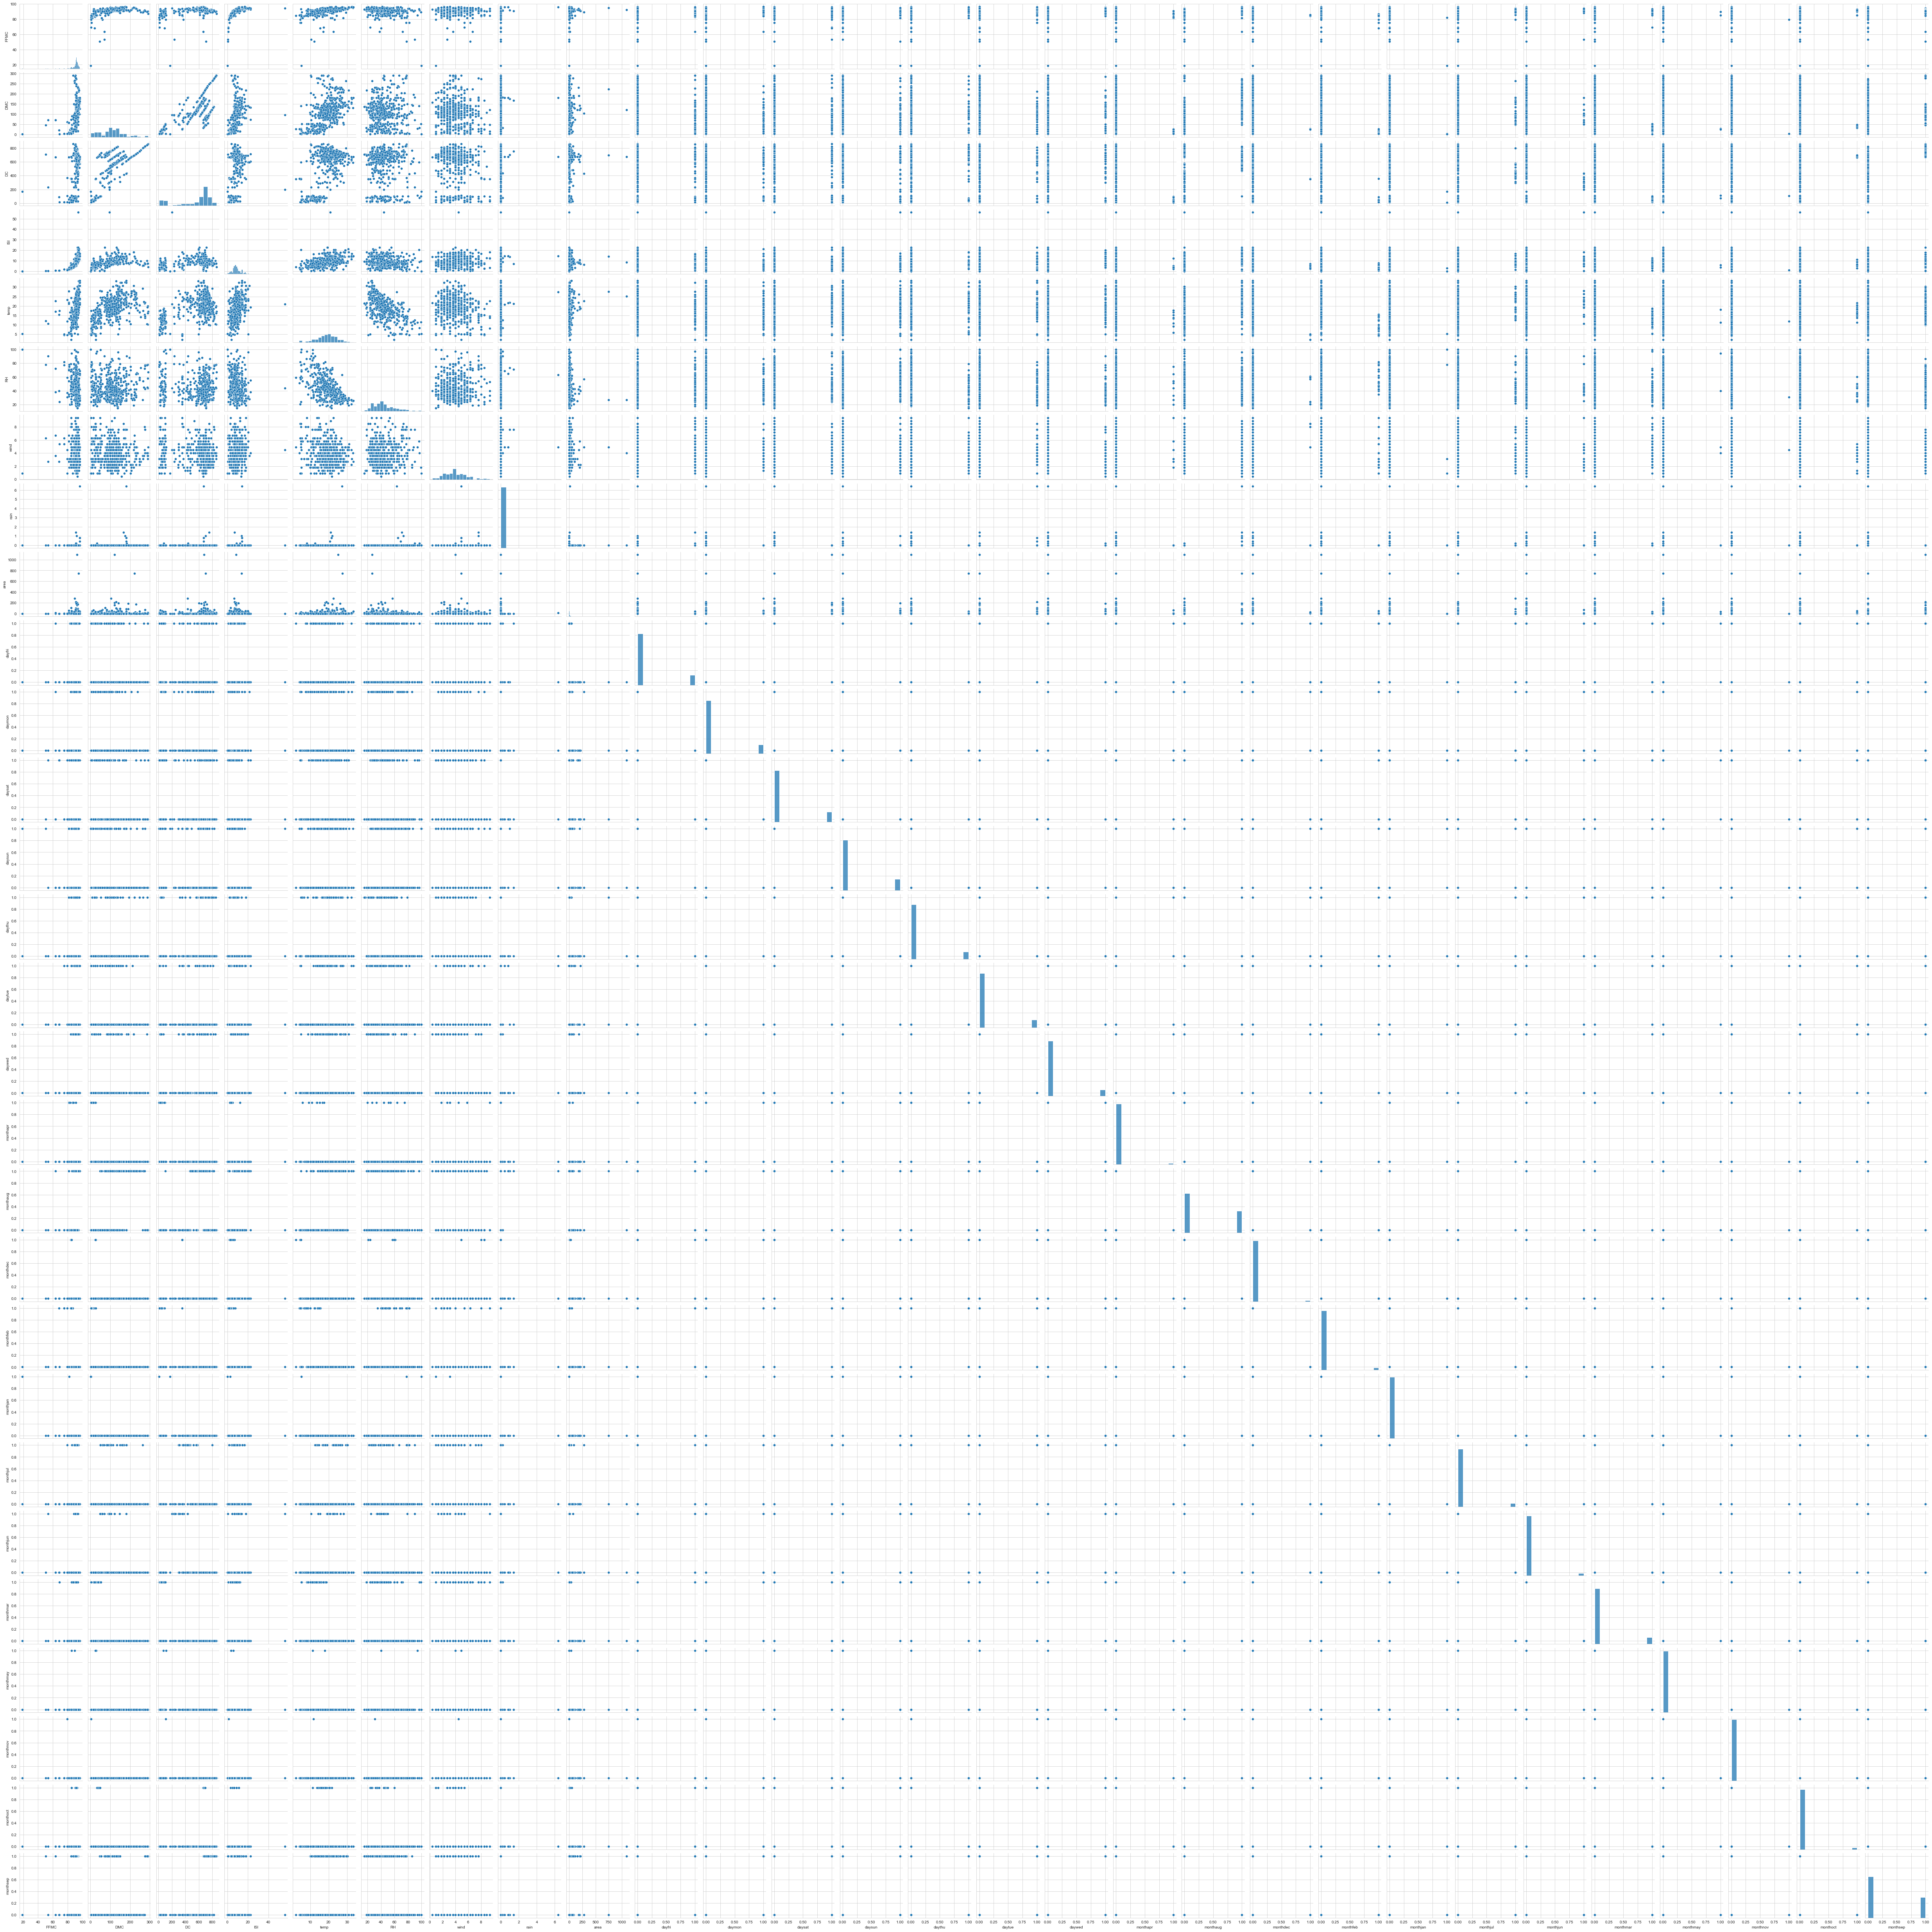

In [9]:
sns.set_style('whitegrid')
sns.pairplot(forest[numerical_feature])
plt.show()

In [11]:
categorical_feature=forest.describe(include=['object']).columns

print(list(categorical_feature))

['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


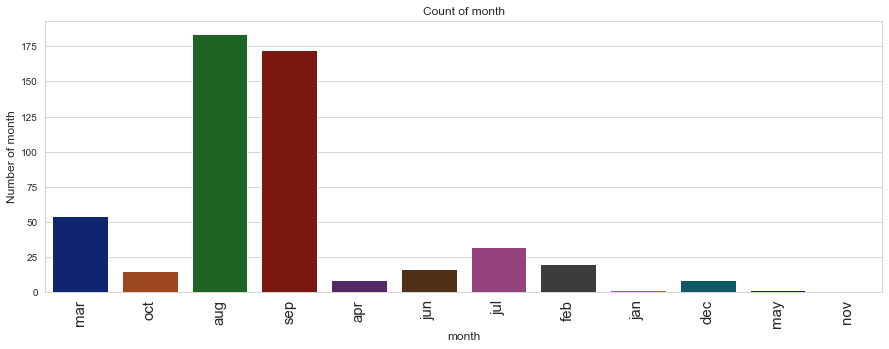

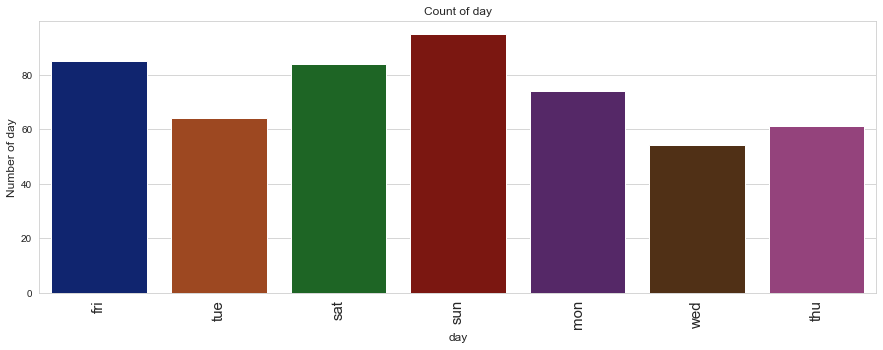

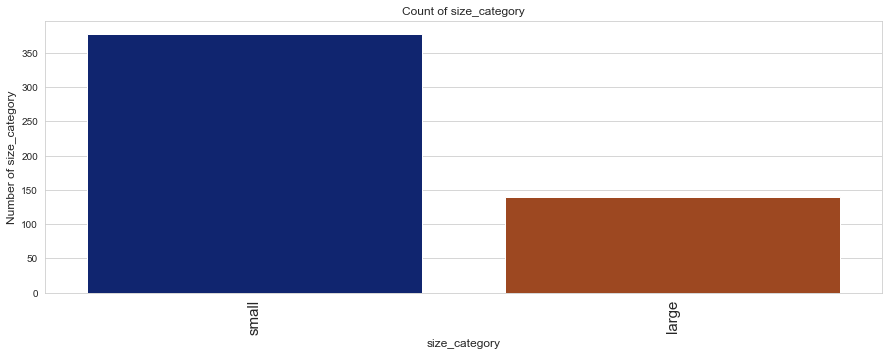

In [34]:
print(categorical_feature)



for idx, column in enumerate(categorical_feature):
    plt.figure(figsize=(15, 5))
    df = forest.copy()
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=forest, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [37]:
data=forest.drop(['month','day'],axis=1)
data

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]

In [38]:
mapping={'small':1, 'large':2}
mapping

{'small': 1, 'large': 2}

In [40]:
data=data.replace(mapping)
data

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              2  
513         0         0              2  
514         0         0              2  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

In [41]:
x=np.array(data.iloc[:,0:28])
y=np.array(data.iloc[:,28])

# NORMALIZING DATA 

In [42]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [44]:
x_norm=norm_func(x)
x_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

# DATA SPLITING

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,stratify = y)

# APPLYING NEURAL NETWORK

In [50]:
model=Sequential()
model.add(Dense(8,input_dim=28,activation='linear'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 1s 6ms/step - loss: 0.6626 - accuracy: 0.4983 - val_loss: 0.5533 - val_accuracy: 0.7097
Epoch 2/120
29/29 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7405 - val_loss: 0.3633 - val_accuracy: 0.7097
Epoch 3/120
29/29 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.7405 - val_loss: 0.1686 - val_accuracy: 0.7097
Epoch 4/120
29/29 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.7405 - val_loss: -0.0252 - val_accuracy: 0.7097
Epoch 5/120
29/29 [==============================] - 0s 2ms/step - loss: -0.0898 - accuracy: 0.7405 - val_loss: -0.2087 - val_accuracy: 0.7097
Epoch 6/120
29/29 [==============================] - 0s 2ms/step - loss: -0.2565 - accuracy: 0.7405 - val_loss: -0.3827 - val_accuracy: 0.7097
Epoch 7/120
29/29 [==============================] - 0s 3ms/step - loss: -0.4074 - accuracy: 0.7405 - val_loss: -0.5343 - val_accuracy: 0.7097
Epoch 

# Accuracy for train data

In [53]:
scores=model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: -4.8541 - accuracy: 0.7312
accuracy: 73.12%


# Accuracy for Test data

In [54]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 1ms/step - loss: -4.8626 - accuracy: 0.7308
accuracy: 73.08%


In [3]:
gas=pd.read_csv("gas_turbines.csv")
gas

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [25]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [26]:
gas.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [4]:
X = gas.iloc[:,0:10]
Y = gas.iloc[:,10]

In [5]:
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO  
0      3.1547  
1      3.2363  
2      3.2012  
3      3.1923  
4      3.2484  
...       ...  
15034  4.5186  
15035  4.8470  
15036  7.9632  
15037  6.2494  
15038  4.9816  

[15039 rows x 10 columns]

In [6]:
Y

0        82.722
1        82.776
2        82.468
3        82.670
4        82.311
          ...  
15034    79.559
15035    79.917
15036    90.912
15037    93.227
15038    92.498
Name: NOX, Length: 15039, dtype: float64

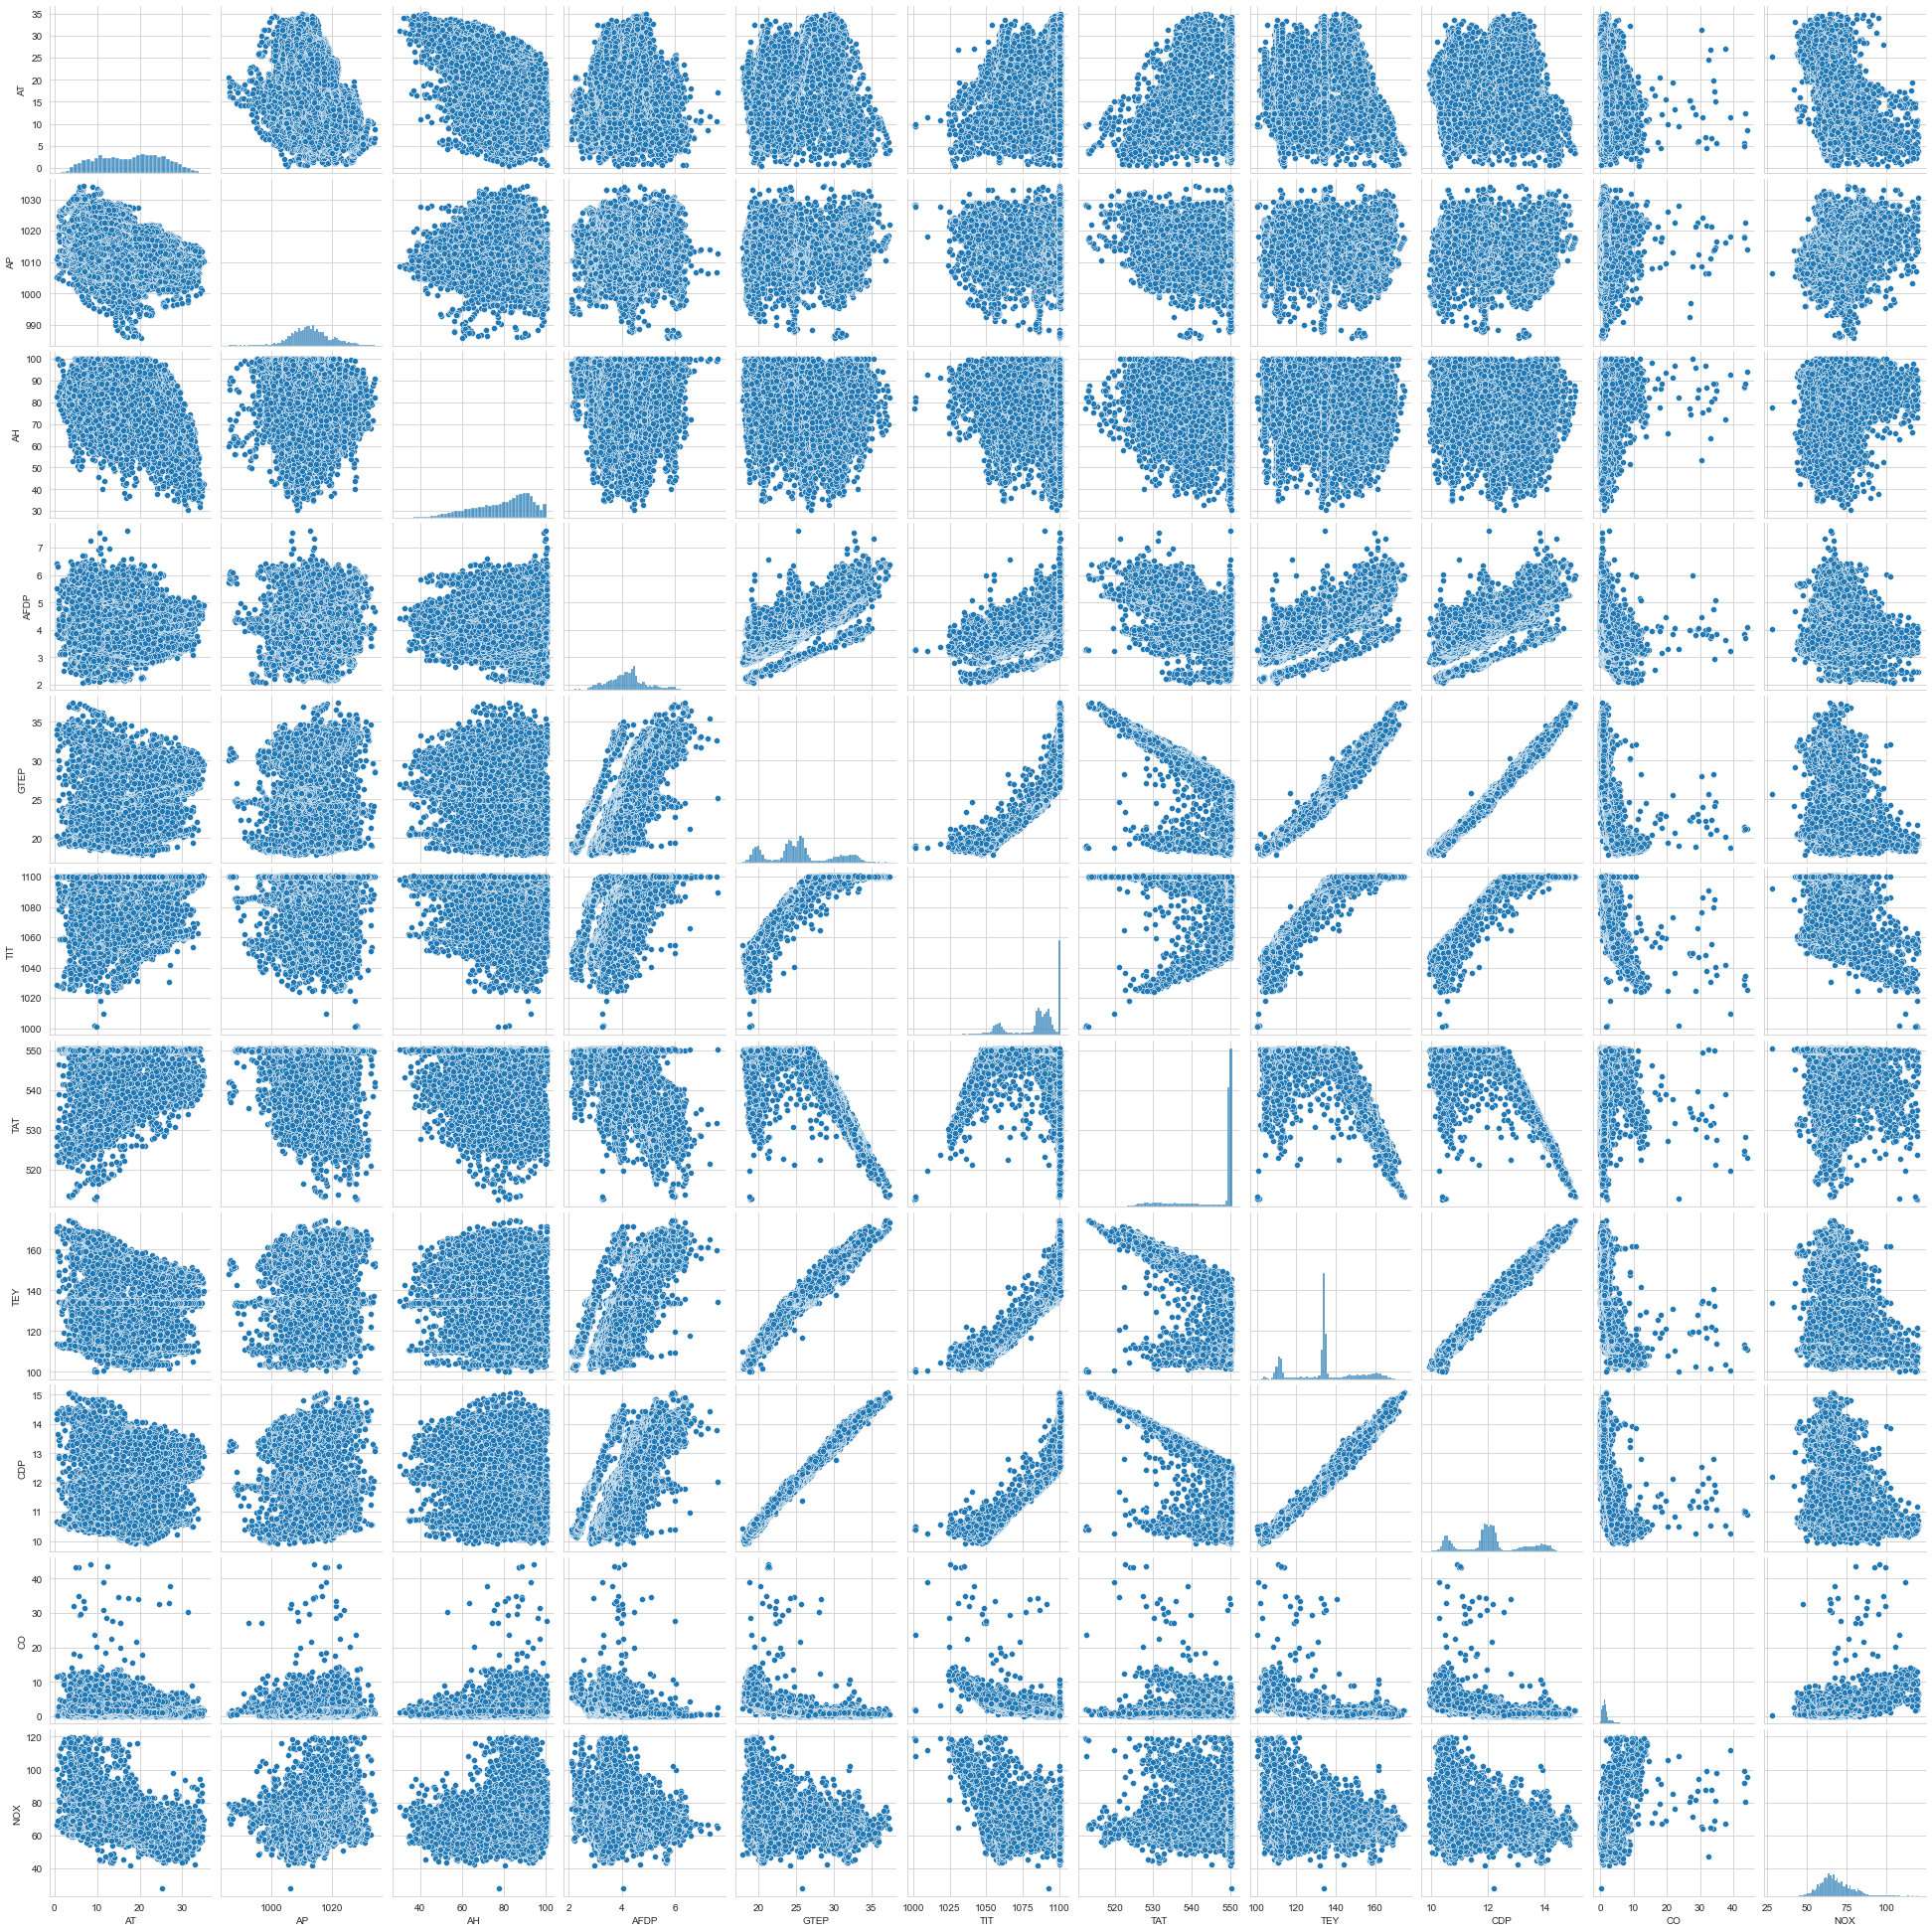

In [8]:
sns.set_style("whitegrid")
sns.pairplot(gas)
plt.show()

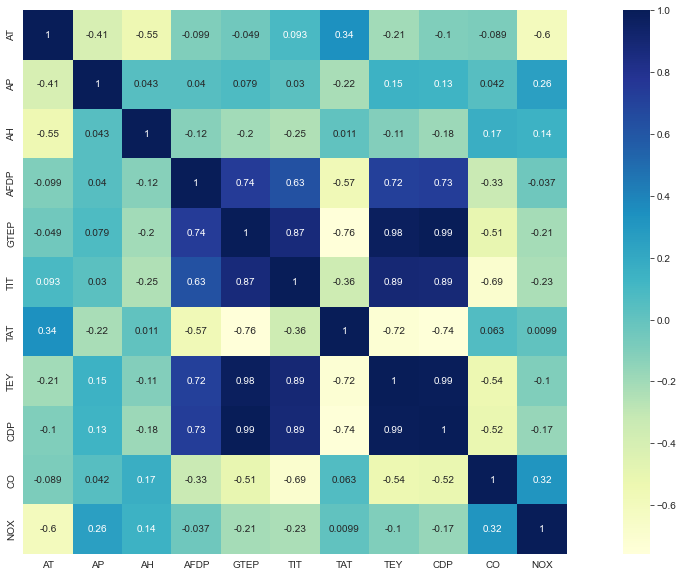

In [18]:
# correlation Matrix
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(gas.corr(), cmap="YlGnBu", square=True, annot=True);

<AxesSubplot:>

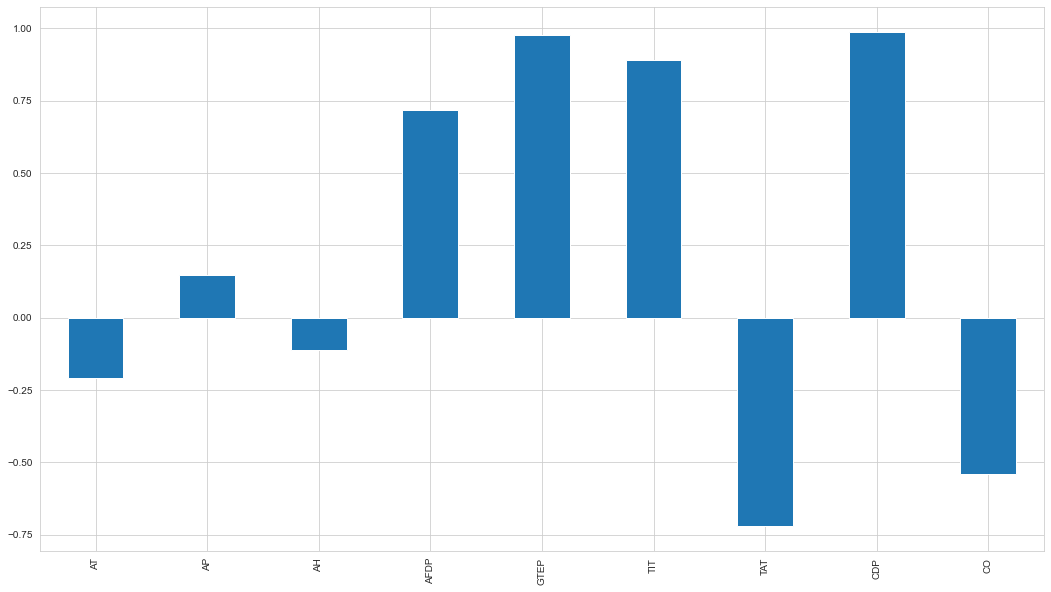

In [23]:
# correlation with TEY
data2 = X.copy()


correlations = data2.corrwith(gas["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
correlations.plot.bar(figsize = (18, 10))

In [24]:
# normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [27]:
X_norm = norm_func(X)

In [28]:
# Applying NN
model1 = Sequential()
model1.add(Dense(12, input_dim=10, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [29]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_norm, Y, epochs=150, batch_size=10)

Epoch 1/150
1504/1504 [==============================] - 4s 2ms/step - loss: -65785.2422 - accuracy: 0.0000e+00
Epoch 2/150
1504/1504 [==============================] - 3s 2ms/step - loss: -875316.0625 - accuracy: 0.0000e+00
Epoch 3/150
1504/1504 [==============================] - 3s 2ms/step - loss: -3153452.2500 - accuracy: 0.0000e+00
Epoch 4/150
1504/1504 [==============================] - 3s 2ms/step - loss: -7327947.5000 - accuracy: 0.0000e+00
Epoch 5/150
1504/1504 [==============================] - 3s 2ms/step - loss: -13715796.0000 - accuracy: 0.0000e+00
Epoch 6/150
1504/1504 [==============================] - 3s 2ms/step - loss: -22597656.0000 - accuracy: 0.0000e+00
Epoch 7/150
1504/1504 [==============================] - 3s 2ms/step - loss: -34281708.0000 - accuracy: 0.0000e+00
Epoch 8/150
1504/1504 [==============================] - 3s 2ms/step - loss: -49083688.0000 - accuracy: 0.0000e+00
Epoch 9/150
1504/1504 [==============================] - 3s 2ms/step - loss: -67320632.

In [32]:
accuracy = model1.evaluate(X, Y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 2ms/step - loss: -83449696223232.0000 - accuracy: 0.0000e+00
Accuracy:  
